In [1]:
from urllib.request import urlopen
import requests
from urllib.request import Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import mysql.connector

In [2]:
URL = 'https://news.google.com/covid19/map?hl=es-419&gl=AR&ceid=AR%3Aes-419'
response = requests.get(URL)
soup = BeautifulSoup(response.content, 'html.parser')

In [3]:
paises = []
pais = soup.find_all('div', attrs={'class','pcAJd'})
for p in pais:
    pa = p.text
    paises.append(pa)

In [4]:
len(paises)

41

In [5]:
T_casos = []
Casos_nuevos = []
Casos_x_1millon = []
Muertes = []
for item in soup.find_all('tr')[1:]:
    a = item.find_all('td')
    T_casos.append(a[0].text)
    Casos_nuevos.append(a[1].text)
    Casos_x_1millon.append(a[3].text)
    Muertes.append(a[4].text)
    #print(a[0].text, a[1].text)

In [6]:
len(Casos_nuevos)

41

In [7]:
len(Casos_x_1millon)

41

In [8]:
len(Muertes)

41

In [9]:
combinada = list(zip(paises, T_casos, Casos_nuevos, Casos_x_1millon, Muertes))

In [10]:
combinada

[('Todos los países', '670,614,966', '210,413', '86,244', '6,832,785'),
 ('Estados Unidos', '102,070,172', '31,067', '309,720', '1,114,977'),
 ('India', '44,684,009', '66', '32,843', '530,740'),
 ('Francia', '38,476,034', '8,215', '573,618', '160,561'),
 ('Alemania', '37,758,773', '19,301', '454,108', '165,563'),
 ('Brasil', '36,807,814', '13,553', '174,167', '696,892'),
 ('Japón', '32,507,929', '21,426', '258,102', '67,853'),
 ('Corea del Sur', '30,176,646', '19,629', '582,779', '33,444'),
 ('Italia', '25,453,789', '0', '422,516', '186,833'),
 ('Reino Unido', '24,274,357', '0', '365,382', '217,262'),
 ('Rusia', '21,635,211', '5,938', '147,434', '387,069'),
 ('Turquía', '17,042,722', '0', '204,951', '101,492'),
 ('España', '13,731,478', '0', '291,536', '118,434'),
 ('Vietnam', '11,526,461', '53', '119,806', '43,186'),
 ('Australia', '11,295,446', 'Sin datos', '440,105', '18,615'),
 ('Argentina', '10,037,135', '4,426', '223,352', '130,421'),
 ('Taiwán', '9,505,551', '22,284', '402,705',

In [11]:
combinada_ok = []
for tupla in combinada:

    valor = []
    for idx in range(1, 5):
        str_numero = tupla[idx].replace(',', '')
        valor.append(int(str_numero) if str_numero.isnumeric() else 0)

    tupla_salida = (tupla[0], valor[0], valor[1], valor[2], valor[3])
    combinada_ok.append(tupla_salida)

In [12]:
combinada_ok

[('Todos los países', 670614966, 210413, 86244, 6832785),
 ('Estados Unidos', 102070172, 31067, 309720, 1114977),
 ('India', 44684009, 66, 32843, 530740),
 ('Francia', 38476034, 8215, 573618, 160561),
 ('Alemania', 37758773, 19301, 454108, 165563),
 ('Brasil', 36807814, 13553, 174167, 696892),
 ('Japón', 32507929, 21426, 258102, 67853),
 ('Corea del Sur', 30176646, 19629, 582779, 33444),
 ('Italia', 25453789, 0, 422516, 186833),
 ('Reino Unido', 24274357, 0, 365382, 217262),
 ('Rusia', 21635211, 5938, 147434, 387069),
 ('Turquía', 17042722, 0, 204951, 101492),
 ('España', 13731478, 0, 291536, 118434),
 ('Vietnam', 11526461, 53, 119806, 43186),
 ('Australia', 11295446, 0, 440105, 18615),
 ('Argentina', 10037135, 4426, 223352, 130421),
 ('Taiwán', 9505551, 22284, 402705, 16276),
 ('Países Bajos', 8581282, 0, 491735, 22990),
 ('Irán', 7564252, 106, 90773, 144747),
 ('México', 7367712, 0, 58207, 332190),
 ('Indonesia', 6729756, 183, 25213, 160810),
 ('Polonia', 6378402, 53, 166195, 118715)

In [13]:
mydb = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = '',
    database = 'proyecto'
)



mycursor = mydb.cursor()

sql = "INSERT INTO covid19(paises, T_casos, Casos_nuevos, Casos_x_1millon, Muertes) VALUES (%s, %s, %s, %s, %s)"

mycursor.executemany(sql, combinada_ok)

mydb.commit()

print(mycursor.rowcount, "FILAS INSERTADAS")

41 FILAS INSERTADAS


In [16]:
lst_paises = [tupla[0] for tupla in combinada_ok]

In [17]:
lst_columna1 = [tupla[1] for tupla  in combinada_ok]
lst_columna2 = [tupla[2] for tupla  in combinada_ok]
lst_columna3 = [tupla[3] for tupla  in combinada_ok]

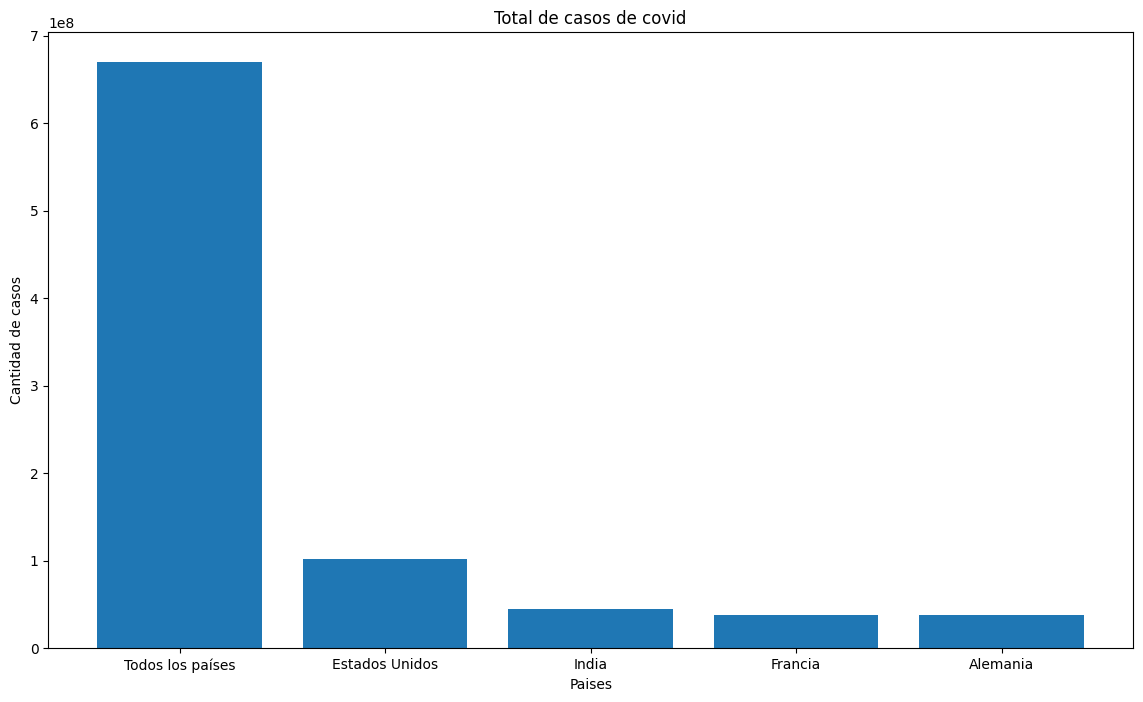

In [19]:
plt.figure(figsize=(14,8))
plt.bar(lst_paises[:5], lst_columna1[:5])
plt.title("Total de casos de covid")
plt.xlabel('Paises')
plt.ylabel('Cantidad de casos')
plt.show()